### Natural unit system is used in this project

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

### Give The Involved Parameters

In [23]:
N = 4 # The number of two-level systems
ΩR0 = 10 # The Amplitude of the applied magnetic flux
g = 0.2 # The coupling energy between the quibit and the resonator
ωd = 2*np.pi # The driving frequency
ωr = 10 # Resonance frequency
ε = 0.01 # The energy bias
Δ = 10 #The energy level sparation of the two-level system
Γ0 = 12.5 # The spontaneous emission rate
Γφ = 0.01 # Dephrasing rate 
T = 10 # The temperature
κ = 0.01 # Resonance loss rate

ωq = np.sqrt(ε**2 + Δ**2) # The eigenfrequency
δω = ωd - ωq
η = np.arctan(ε/Δ) 
β = np.arctan(δω/(ΩR0*np.cos(η)))
ΩR = np.sqrt(ΩR0**2 * np.cos(η)**2 + δω**2) # Rabi frequency
Nth = 1/(np.exp(ωq/T) - 1 ) #Thermal distribution function

### Give the relaxation,excitation and dephasing rates in the rotating frame:
  $$ \Gamma_{\uparrow,\downarrow} = \frac{\Gamma_{0}}{4}\cos^{2}{\eta}(1\pm\sin{\beta})+\frac{\Gamma_{\varphi}}{2}\sin^{2}{\eta}\cos^{2}{\beta}$$

  $$ \Gamma_{\varphi} = \frac{\Gamma_{0}}{2}\cos^{2}{\eta}\cos^{2}{\beta} + \Gamma_{\varphi}\sin^{2}{\eta}\sin^{2}{\beta} $$

In [24]:
Γu = (Γ0/4)*np.cos(η)**2 * (1 + np.sin(β))**2 + (Γφ/2)*np.sin(η)**2 * np.cos(β)**2
Γd = (Γ0/4)*np.cos(η)**2 * (1 - np.sin(β))**2 + (Γφ/2)*np.sin(η)**2 * np.cos(β)**2
Γφbar = (Γ0/2)*np.cos(η)**2 * np.cos(β)**2 + Γφ*np.sin(η)**2 * np.sin(β)**2

### Define the Creation and Annihilation Operators:

In [25]:
a = tensor(destroy(N),qeye(2))
ad =  a.dag()

### Spin Matrices :

In [26]:
sx = tensor(qeye(N),sigmax())
sz = tensor(qeye(N),sigmaz())
sm = tensor(destroy(N), qeye(2))
sp = sm.dag()

### Construction the Master Equation and Solve it
$$
\begin{aligned}
    \dot{\rho} & = - i[\hat{H},\rho] + \frac{\Gamma_{\downarrow}}{2}(2\sigma_{-}\rho\sigma_{+}-\rho\sigma_{+}\sigma_{-} - \sigma_{+}\sigma_{-}\rho) + \frac{\Gamma_{\uparrow}}{2}(2\sigma_{+}\rho\sigma_{-} - \rho\sigma_{-}\sigma_{+} - \sigma_{-}\sigma_{+}\rho) + \Gamma_{\varphi}(\sigma_{z}\rho\sigma_{z} - \rho) + \frac{\kappa}{2}(N_{th} + 1)(2a\rho a^{\dagger} - \rho a^{\dagger}a - a^{\dagger}a\rho)+\frac{\kappa}{2}N_{th}(2a^{\dagger}\rho a - aa^{\dagger} - \rho a a^{\dagger})
\end{aligned}
$$
#### The Hamiltonian
$$ 
\begin{aligned} 
\hat{H} = & \omega_{r} a^{\dagger}a + \frac{1}{2}\Omega_{R}\sigma_{z}  +g\sin{\eta}[\sin{\beta}\sigma_{z} - \cos{\beta}\sigma_{x}](a+a^{\dagger})  - \frac{g^{2}}{\omega_{q}}\cos^{2}{\eta}[\sin{\beta}\sigma_{z} - \cos{\beta}\sigma_{x}](a + a^{\dagger})^{2}
\end{aligned} 
$$

In [27]:
H = ωr*ad*a + 0.5*ΩR*sz+ g*np.sin(η)*(np.sin(β)*sz-np.cos(β)*sx)*(a+ad) - (g**2/ωq)*np.cos(η)**2 * (np.sin(β)*sz-np.cos(β)*sx)*(a + ad)**2
c_ops = [np.sqrt(Γd)*sm, np.sqrt(Γu)*sp , np.sqrt(Γφbar)*sz, np.sqrt(κ*(Nth+1))*a , np.sqrt(κ*Nth)*ad] #A list of collapse operators
tlist = np.linspace(0,2,1000)
rho = tensor(fock(N,0),fock(2,1))
e_ops = [a*ad] # The observables whose expaction to be calculated
result  = mesolve(H,rho,tlist,c_ops,e_ops)

### Visualization

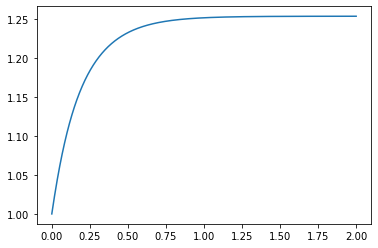

In [28]:
plt.plot(tlist,result.expect[0])
plt.show()